# Spin qubit measurement software

Also see: https://github.com/VandersypenQutech/qtt/

Load packages

In [7]:
import sys, os, tempfile
import numpy as np
%matplotlib inline
%gui qt
import qcodes
from qcodes import QtPlot
from qcodes import MatPlot
import qtt
from qtt.measurements.scans import scanjob_t

# set data directory
datadir = os.path.join(tempfile.tempdir, 'qdata')
qcodes.DataSet.default_io = qcodes.DiskIO(datadir)    

## Load your station

The model resembles the a 3-dot spin-qubit dot setup. The hardware consists of a virtual
keithley, IVVI racks and a virtual gates object.

In [3]:
import virtualDot
nr_dots = 2
station = virtualDot.initialize(nr_dots=nr_dots)

keithley1 = station.keithley1
keithley3 = station.keithley3

# virtual gates for the model
gates = station.gates

sys.executable C:\Users\eendebakpt\AppData\Local\Continuum\Anaconda3\envs\py35\python.exe
initialize: create DotModel on server None 
initialize: DotModel created
initialize: set values on T and R gate
initialize: create keithley1
initialize: create keithley3
initialized virtual dot system


## Setup measurement windows

We have
* a parameter viewer
* a lot plotting window

In [4]:
pv = qtt.createParameterWidget([gates, ])
mwindows = qtt.tools.setupMeasurementWindows(station, create_parameter_widget=False)
plotQ = mwindows['plotwindow']   

## Read out instruments

In [5]:
print('gate R: %.1f, amplitude: %f' % (gates.R.get(),  keithley3.readnext()) )
snapshotdata = station.snapshot()

gate R: -0.0, amplitude: 0.995116


## Simple 1D scan loop

We use the `scan1D` function. This function has `scanjob` as argument.

In [8]:
scanjob = scanjob_t({'sweepdata': dict({'param': 'R', 'start': -500, 'end': 1, 'step': .8, 'wait_time': 1e-2}), 'minstrument': [keithley3.amplitude]})
data1d = qtt.measurements.scans.scan1D(station, scanjob, location=None, verbose=1)

loop R: 0/627 (0.0 [s])
loop R: 94/627 (1.0 [s])
loop R: 188/627 (2.0 [s])
loop R: 282/627 (3.0 [s])
loop R: 374/627 (4.0 [s])
loop R: 464/627 (5.0 [s])
loop R: 558/627 (6.0 [s])
DataSet:
   location = '2017-05-15/12-55-33_qtt_scan1D'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | gates_R_set         | R            | (627,)
   Measured | keithley3_amplitude | amplitude    | (627,)
started at 2017-05-15 12:55:40


## Print the scanned data

keithley3_amplitude
analyseGateSweep: leftval 0.0, rightval 0.3
p0 0.1, pmid -0.0, leftval[0] -0.0


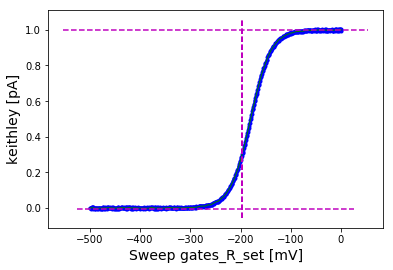

In [9]:
print( data1d.default_parameter_name() )
adata = qtt.algorithms.gatesweep.analyseGateSweep(data1d, fig=100)

##  Make a 2D scan

In [10]:
start=-500
scanjob = scanjob_t({'sweepdata': dict({'param': 'R', 'start': start, 'end': start+400, 'step': 4.}), 'minstrument': ['keithley1'], 'wait_time': 0.})
scanjob['stepdata'] = dict({'param': 'L', 'start': start, 'end': start+400, 'step': 1.})
data = qtt.measurements.scans.scan2D(station, scanjob, liveplotwindow=plotQ)

scan2D: 0/400: time 0.5: setting L to -500.000
scan2D: 71/400: time 2.1: setting L to -429.000
scan2D: 146/400: time 3.6: setting L to -354.000
scan2D: 220/400: time 5.1: setting L to -280.000
scan2D: 295/400: time 6.7: setting L to -205.000
scan2D: 366/400: time 8.2: setting L to -134.000


## More analysis

straightenImage: fx 4.0000 fy 1.0000
straightenImage: result mvx 1.0000 mvy 1.0000
findCrossTemplate: threshold: 0.7, 4 local maxima
singleElectronCheck: check 0: false


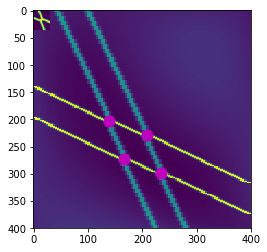

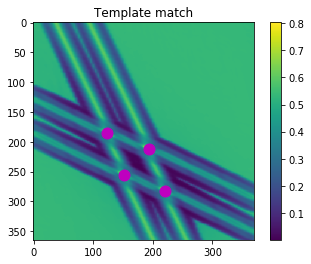

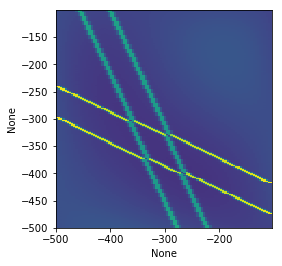

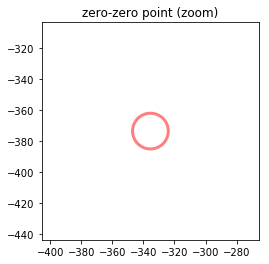

In [11]:
#qtt.scans.plotData(data, fig=30)
pt, resultsfine = qtt.legacy.analyse2dot(data, fig=300, efig=400, istep=1, verbose=2)

## Send data to powerpoint

We can copy data from a dataset to Powerpoint using `qtt.tools.addPPT_dataset(dataset)`.

In [ ]:
_=qtt.tools.addPPT_dataset(data, verbose=1)    

## Show the recorded data

In [ ]:
logviewer = qtt.gui.dataviewer.DataViewer(datadir=datadir, verbose=1)